In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

In [2]:
dataset = pd.read_csv('src/conversion_data_train.csv')

In [3]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [4]:
dataset.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [5]:
dataset['new_user'] =  dataset['new_user'].astype(str)
dataset['new_user'] = [ 'Yes' if x == '1' else 'No' for x in dataset['new_user'] ]

In [6]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,Yes,Direct,2,0
1,UK,21,Yes,Ads,3,0
2,Germany,20,No,Seo,14,1
3,US,23,Yes,Seo,3,0
4,US,28,Yes,Direct,3,0


In [7]:
#Test on sample 
#data_sample = dataset.sample(1000)

## Correlation Matrix

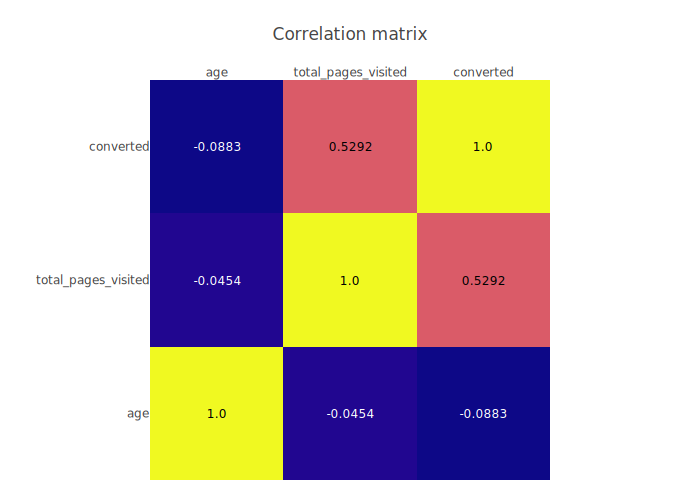

In [8]:
corr_matrix = round(dataset.corr(), 4)

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.values.tolist(),
                                  y = corr_matrix.index.values.tolist(),
                                  )
fig.update_layout(
    title = go.layout.Title(text = 'Correlation matrix', x = 0.5), showlegend = False, 
            autosize=False, width=700, height=500, margin=dict(l=150, r=150, t=80, b=20)),

fig.show()

In [9]:
dataset.dtypes

country                object
age                     int64
new_user               object
source                 object
total_pages_visited     int64
converted               int64
dtype: object

## Plots of columns

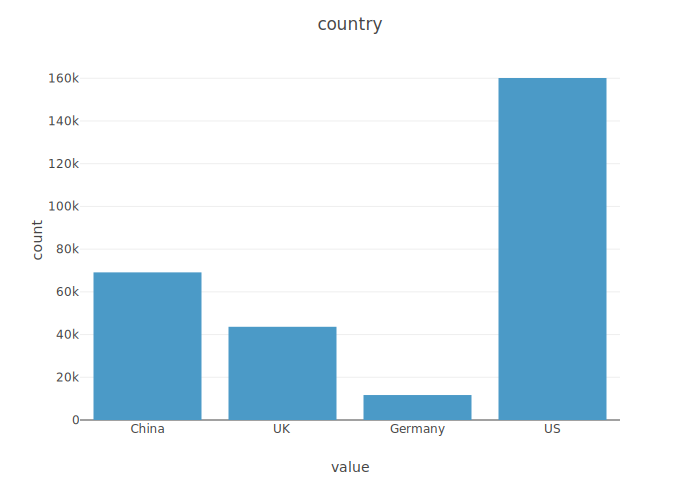

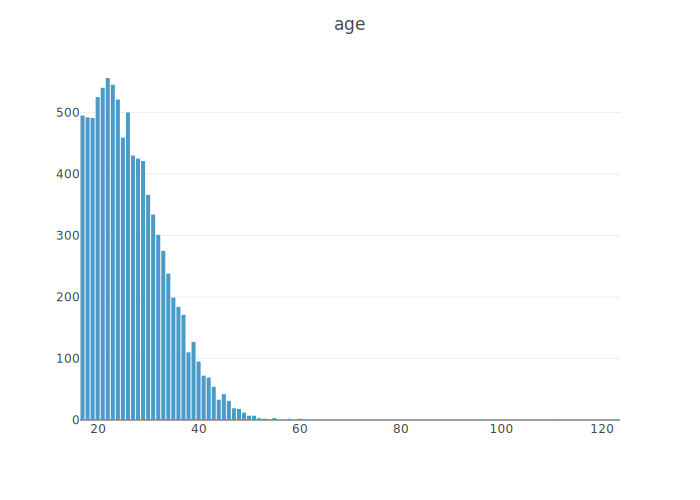

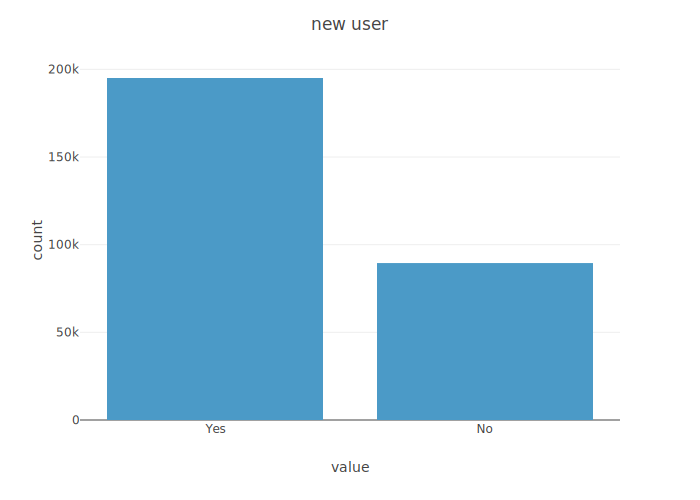

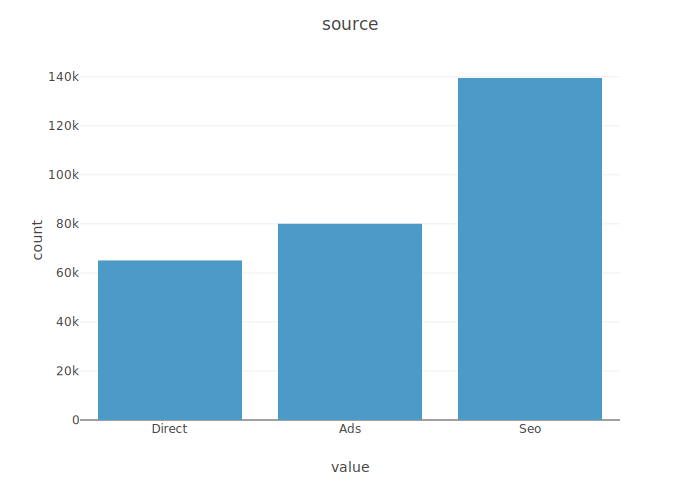

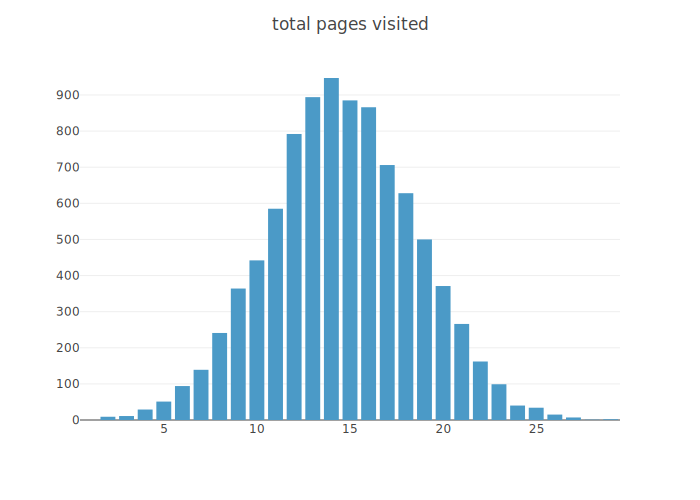

In [10]:
dataset_plot = dataset
target = 'converted'
explain_values = dataset_plot.drop(columns=[target])

for column in explain_values.columns:
    if dataset_plot[column].dtypes == "object":
        # Quantitative Values
        fig = px.histogram(dataset_plot[column])
        fig.update_layout(title= f"{column.replace('_', ' ')}")
        fig.update_layout(showlegend=False)
        fig.show()

    else:
        # Qualitative Values 
        cat_data = dataset_plot.groupby(column)[target].sum()
        fig = px.bar(x=cat_data.index, y=cat_data, labels=dict(x="", y=""))
        fig.update_layout(title= f"{column.replace('_', ' ')}")
        fig.show()